# Detection Model

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](ここに以下の書式でURLを入れる) 
[![github](https://badgen.net/badge/:status/View%20On%20Github/black?icon=github&label)](https://github.com/AtomScott/SoccerTrack)
[![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=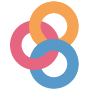)](https://)

---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sportslabkit as slk

dataset_path = slk.datasets.get_path("wide_view")
path_to_csv = sorted(dataset_path.glob("annotations/*.csv"))[0]
path_to_mp4 = sorted(dataset_path.glob("videos/*.mp4"))[0]

root = slk.utils.get_git_root()
cam = slk.Camera(path_to_mp4)

# let's load the first frame of the video
frame = cam.get_frame(0)

## Show the models available

In [3]:
slk.detection_model.show_available_models()

['DummyDetectionModel', 'YOLOv5', 'YOLOv5l', 'YOLOv5m', 'YOLOv5n', 'YOLOv5s', 'YOLOv5x', 'YOLOv8', 'YOLOv8l', 'YOLOv8m', 'YOLOv8n', 'YOLOv8s', 'YOLOv8x']


## Load a model

You can load a model by using the `load` function. The function searches subclasses of BaseDetectionModel for a match with the given name. If a match is found, an instance of the model is returned. If no match is found, a warning is logged and the function returns None. 

There are three arguments to the `load` function:
* model_name: The name of the model to load. This is the name of the class, not the name of the file. It is not case sensitive.
* model_config: A dictionary containing the configuration for the model.
* inference_config: A dictionary containing the configuration for the inference engine.

In [4]:
det_model = slk.detection_model.load(model_name="yolov5s")

# You can check the current configuration with the following methods:
det_model.show_inference_config()
det_model.show_model_config()

Using cache found in /Users/atom/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-4-15 torch 2.0.1 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


show_inference_config:0279  💬| Inference configuration: 
show_inference_config:0281  💬|   augment: False 
show_inference_config:0281  💬|   size: 640 
show_inference_config:0281  💬|   profile: False 
show_model_config:0274  💬| Model configuration: 
show_model_config:0276  💬|   ckpt:  
show_model_config:0276  💬|   repo: ultralytics/yolov5 
show_model_config:0276  💬|   name: yolov5s 
show_model_config:0276  💬|   conf: 0.25 
show_model_config:0276  💬|   iou: 0.45 
show_model_config:0276  💬|   agnostic: False 
show_model_config:0276  💬|   multi_label: False 
show_model_config:0276  💬|   classes: None 
show_model_config:0276  💬|   max_det: 1000 
show_model_config:0276  💬|   amp: False 


## Run detection on a single frame

The input to the model should be flexible. It accepts numpy.ndarray, torch.Tensor, pathlib Path, string file, PIL Image, or a list of any of these. All inputs will be converted to a list of numpy arrays representing the images.

The output of the model is expected to be a list of `Detections` objects, where each `Detections` object represents a group of detected objects in an image.

<class 'sportslabkit.types.detections.Detections'>
      bbox_left    bbox_top  bbox_width  bbox_height      conf  class
0   3466.391602  801.390747   63.701904    92.222412  0.849213    0.0
1   3747.301270  663.855103   26.516602    71.434509  0.808534    0.0
2   2837.196289  586.880493   20.092529    56.812317  0.728038    0.0
3   3065.378662  591.651978   25.591309    58.877136  0.724596    0.0
4   3816.991455  578.123291   16.481934    49.973877  0.701101    0.0
5   3541.677246  606.524536   30.815674    54.752747  0.633019    0.0
6   4269.717773  534.560120   16.832520    33.796143  0.557433    0.0
7   2917.936279  531.887817   22.650879    51.573120  0.525037    0.0
8   4119.772461  535.993774   19.048828    26.631165  0.466014    0.0
9   3284.744141  526.443054   14.508301    36.542236  0.429612    0.0
10  3826.764893  522.474243   14.240723    35.303528  0.408996    0.0
11  3256.889648  956.409790   33.006592    25.906067  0.402175   32.0
12  3573.783936  575.707031   17.346680

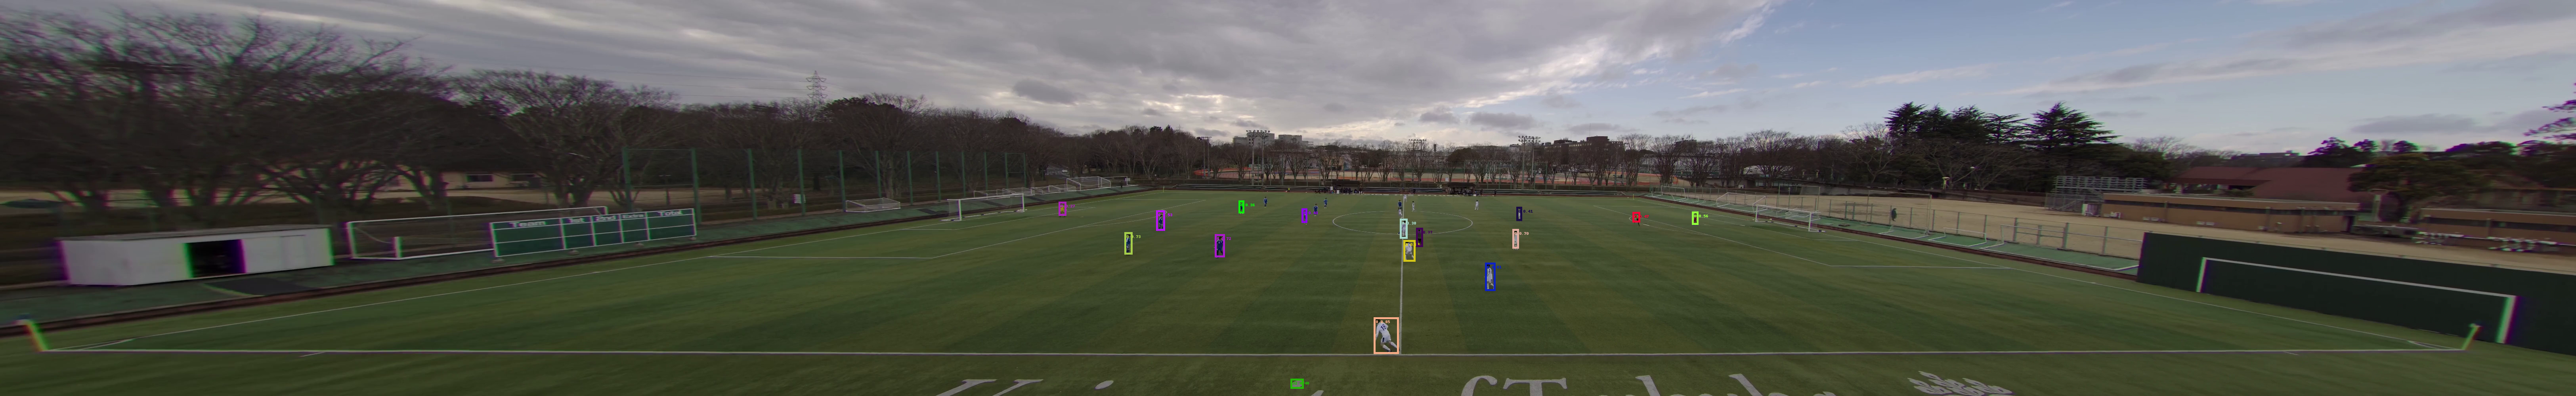

In [5]:
det_result = det_model(frame, size=2160)[0]
print(type(det_result)) # the result is a Detections object

print(det_result.to_df()) # print the results as a dataframe
det_result.show(width=5) # show the bounding boxes on the frame

## Run detection on multiple frames (batched input)

Number of results: 10
      bbox_left    bbox_top  bbox_width  bbox_height      conf  class
0   3466.391602  801.390747   63.701904    92.222412  0.849213    0.0
1   3747.301270  663.855103   26.516602    71.434509  0.808534    0.0
2   2837.196289  586.880493   20.092529    56.812317  0.728038    0.0
3   3065.378662  591.651978   25.591309    58.877136  0.724596    0.0
4   3816.991455  578.123291   16.481934    49.973877  0.701101    0.0
5   3541.677246  606.524536   30.815674    54.752747  0.633019    0.0
6   4269.717773  534.560120   16.832520    33.796143  0.557433    0.0
7   2917.936279  531.887817   22.650879    51.573120  0.525037    0.0
8   4119.772461  535.993774   19.048828    26.631165  0.466014    0.0
9   3284.744141  526.443054   14.508301    36.542236  0.429612    0.0
10  3826.764893  522.474243   14.240723    35.303528  0.408996    0.0
11  3256.889648  956.409790   33.006592    25.906067  0.402175   32.0
12  3573.783936  575.707031   17.346680    48.802063  0.365244    0.

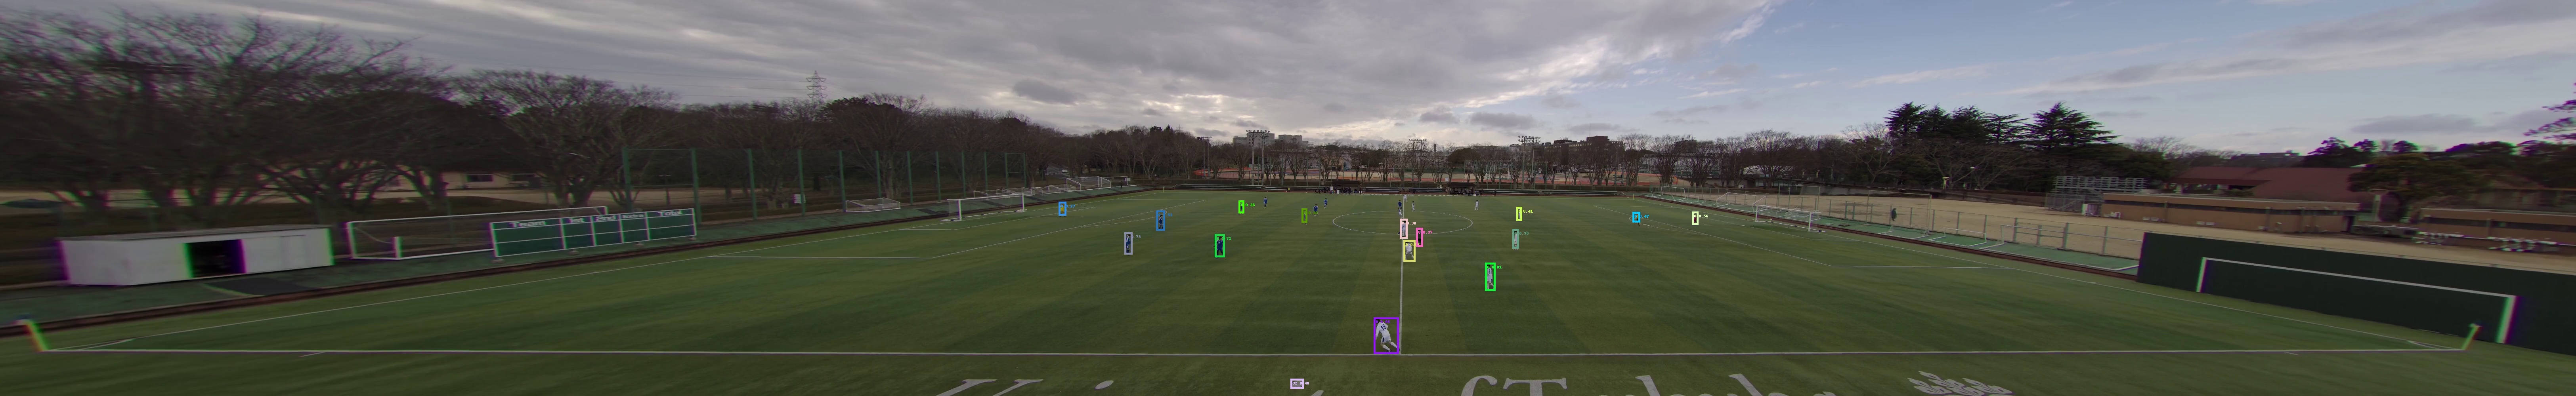

In [6]:
det_results = det_model(cam[:10], size=2160)

print(f'Number of results: {len(det_results)}')

det_result = det_results[0]
print(det_result.to_df()) # print the results as a dataframe
det_result.show(width=5) # show the bounding boxes on the frame